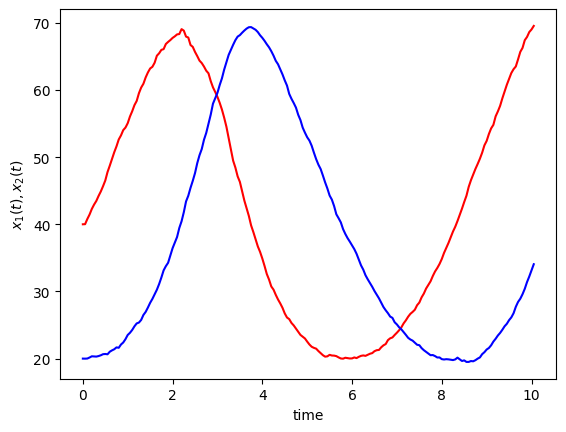

In [ ]:
'''
  アルゴリズム5: 確率微分方程式のシミュレーション手法
  - Lotka-Volterra系
  - 図5.10(b)のようなものを描画できる
  - 実際には乱数を一度に生成するなどの工夫をしたほうが高速
'''
import numpy as np
import matplotlib.pyplot as plt

#-- 各種設定
# 定数の設定
Omega = 100.0
R = 3 # イベントの数
c = [0.8, 0.02, 0.8]

# 状態に依存する関数(propensity functioin)の設定
gamma_r = [lambda n: c[0]*n[0],
             lambda n: c[1]*n[0]*n[1],
             lambda n: c[2]*n[1]]
# 各イベントでの状態遷移の設定
v_e = np.array([[+1, 0],
                 [-1,+1],
                 [ 0,-1]])

# 乱数の種の設定
rng = np.random.default_rng(41736)

# シミュレーションの設定
D = 2 # 変数の数（次元）
x_ini = [40, 20] # 量の初期値
Dt = 1.0e-3 # オイラー - 丸山法でのΔt
Dt_obs = 5.0e-2 # プロットのための時間間隔
T = 10.0 # 終了時刻

#-- シミュレーション
obs_time_array = []
results = []

# アルゴリズム5 1行目（時刻は
x = x_ini
t = 0.0
obs_t = 0.0
result = []
result.append(x)
obs_time_array.append(obs_t)
while t <= T: # アルゴリズム5 2行目
    t = t + Dt # アルゴリズム5 3行目
    dW = rng.standard_normal(size=(R)) # アルゴリズム5 5行目（一度に生成）
    # 以下で drift: a(x,t) と diff: B(x,t)を計算
    drift = 0.0
    diff = 0.0
    for r, gamma in enumerate(gamma_r):
        comp = gamma(x)
        drift = drift + v_e[r] * comp * Dt
        diff = diff + v_e[r] * np.sqrt(comp*Dt/Omega) * dW[r]
    x = x + drift + diff # アルゴリズム5 7行目
    # Lotka-Volterra系では状態は負にはならないことの処理
    if x[0] < 0.0:
        x[0] = 0.0
    if x[1] < 0.0:
        x[1] = 0.0
    # プロットのための保存
    if t >= (obs_t-1.0e-6):
        obs_t = obs_t + Dt_obs
        result.append(x)
        obs_time_array.append(obs_t)
result = np.array(result).T
#-- プロット
# 今は状態変数が2つの場合のみに対応
plt.plot(obs_time_array, result[0], color='r')
plt.plot(obs_time_array, result[1], color='b')
plt.xlabel('time')
plt.ylabel('$x_1(t), x_2(t)$')
plt.show()